#  Prediction Using Unsupervised Machine Learning

Name : Ahmad Raja Khan

Linkedin : https://www.linkedin.com/in/ahmad-khan-368813209/

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

# Loading the Iris Dataset from SkLearn

In [7]:
iris_data = datasets.load_iris()
iris_x_df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
iris_x_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [9]:
iris_x_df.shape

(150, 4)

In [10]:
iris_x_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [11]:
iris_x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


# Using 'Elbow Method' to find optimum number of clusters for k-means classification

In [12]:
from sklearn.cluster import KMeans
x = iris_x_df.iloc[:, :].values
wcs = [] #within clusters sum of squares

for i in range (1,21):
    model = KMeans(n_clusters = i, init = 'k-means++', max_iter = 250, n_init = 15, random_state = 0)
    model.fit(x)
    wcs.append(model.inertia_)
    
print(wcs)
    

[681.3706, 152.3479517603579, 78.85144142614601, 57.22847321428571, 46.44618205128205, 39.03998724608725, 34.299712121212124, 30.06311061745273, 28.12412926108979, 26.09432474054042, 24.49239528673082, 22.713918404916974, 21.69098328206881, 20.04909138230191, 18.89824681020734, 17.905960735171263, 17.130082792207794, 16.46601160097213, 15.305296703296706, 14.904289072039074]


# Plotting the result (Line Graph)

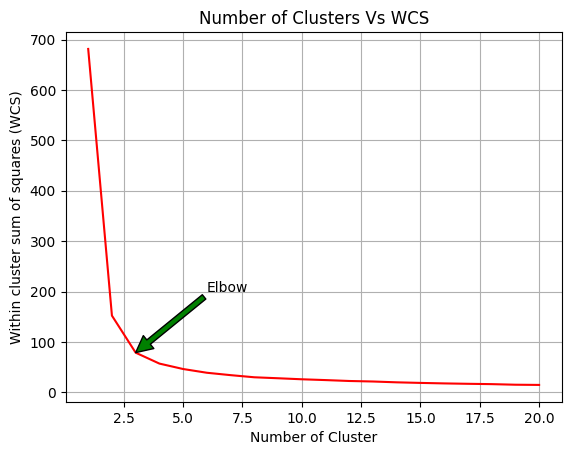

In [14]:
plt.plot(range(1,21), wcs, color = 'r')
plt.title('Number of Clusters Vs WCS')
plt.xlabel('Number of Cluster')
plt.ylabel('Within cluster sum of squares (WCS)')
plt.annotate('Elbow', xytext=(6,200), xy=(3,79), arrowprops={'facecolor':'green'})
plt.grid()
plt.show()


Elbow occurs where the line graph bends and WCS does not decrease significantly with every iteration. From the above graph it can be said that elbow occurs at number of clusters equivalent to 3. 

So, optimium number of cluster for this iris dataset = 3

# create and train the model k-means 

In [16]:
model = KMeans(n_clusters= 3, init = 'k-means++', max_iter = 250, n_init = 15, random_state = 0)
y = model.fit_predict(x)

In [17]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

#  Visualizing the cluster by plotting Scatter Graph

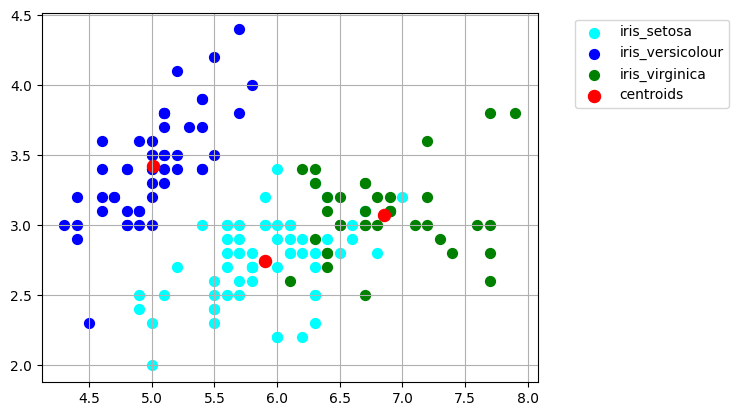

In [18]:
plt.scatter(x[y==0,0], x[y==0,1], s=50, c = 'cyan', label = 'iris_setosa')
plt.scatter(x[y==1,0], x[y==1,1], s=50, c = 'blue', label = 'iris_versicolour')
plt.scatter(x[y==2,0], x[y==2,1], s=50, c = 'green', label = 'iris_virginica')

#Plotting the centroid of each clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 75, c = 'red', label = 'centroids')

plt.legend(loc=1, bbox_to_anchor = (1.4, 1))
plt.grid()


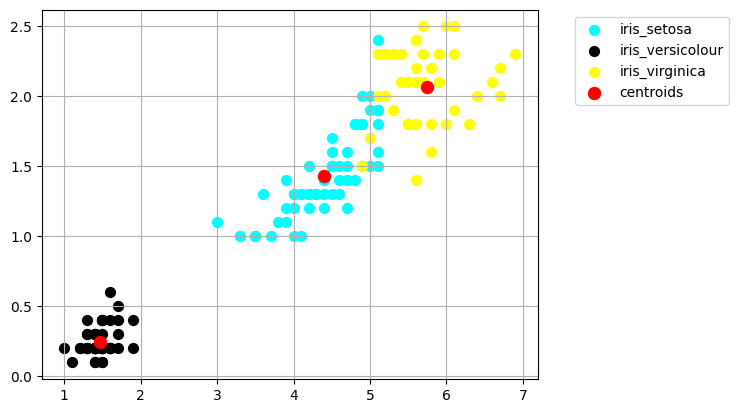

In [21]:
#Plotting the three three clusters of third and fourth columns(peadal_length, peadal_width) of iris dataset

plt.scatter(x[y==0,2], x[y==0,3], s=50, c = 'cyan', label = 'iris_setosa')
plt.scatter(x[y==1,2], x[y==1,3], s=50, c = 'black', label = 'iris_versicolour')
plt.scatter(x[y==2,2], x[y==2,3], s=50, c = 'yellow', label = 'iris_virginica')

#Plotting the centroid of each clusters
plt.scatter(model.cluster_centers_[:, 2], model.cluster_centers_[:, 3], s = 75, c = 'red', label = 'centroids')

plt.legend(loc=1, bbox_to_anchor = (1.4, 1))
plt.grid()